In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Problem Statement

**classify the Size_Category using SVM**

|Column Name |Description|
|------------|-----------|
|month	|: month of the year: 'jan' to 'dec'|
|day	 |   : day of the week: 'mon' to 'sun'|
|FFMC	|: FFMC index from the FWI system: 18.7 to 96.20|
|DMC	 |   : DMC index from the FWI system: 1.1 to 291.3|
|DC	    |: DC index from the FWI system: 7.9 to 860.6|
|ISI	 |   : ISI index from the FWI system: 0.0 to 56.10|
|temp	|: temperature in Celsius degrees: 2.2 to 33.30|
|RH	    |: relative humidity in %: 15.0 to 100|
|wind	|: wind speed in km/h: 0.40 to 9.40|
|rain	|: outside rain in mm/m2 : 0.0 to 6.4|
|Size_Category |: 	the burned area of the forest ( Small , Large)|

In [2]:
rawData = pd.read_csv('forestfires.csv')
rawData[rawData.month == 'mar'].head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
16,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
18,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,small


Appears that the ``month`` and ``day`` columns are already converted to numerical columns using getdummies.

In [3]:
rawData.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

No null values - hence proceed

In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

**Data is an imbalanced data but it is a small dataset with 517 columns**

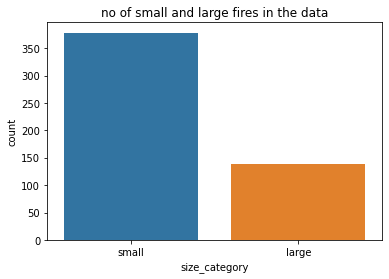

In [5]:
sns.countplot(x=rawData.size_category)
plt.title('no of small and large fires in the data')
plt.show()

# encoding the ``size_category`` feature

In [6]:
# encoding the Y variable
rawData['size_category'] = rawData.size_category.map({'small':0,'large':1})
rawData

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
rawData.area

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

# Checking the correlation

**there is no corrleatin greater than .68 (enjoyed by ``DC`` and ``DMC``), for any other column.**

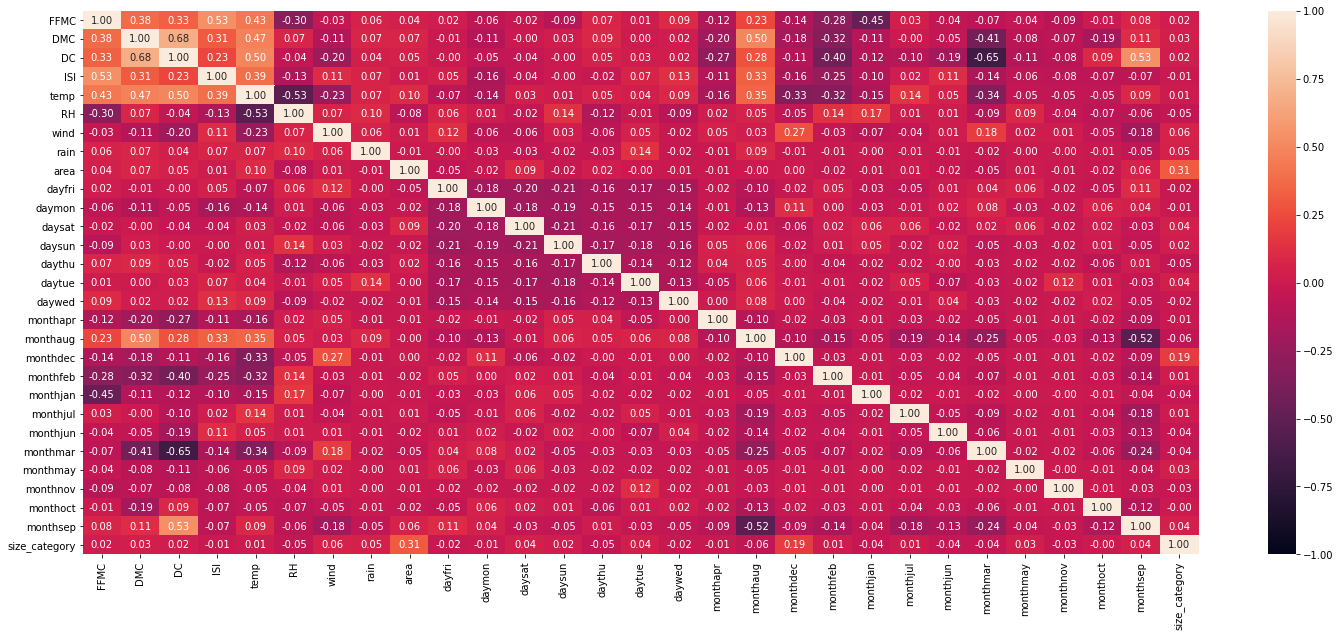

In [8]:
plt.figure(figsize=(25,10))
sns.heatmap(rawData.corr(),vmax=1,vmin=-1,annot=True,fmt='.2f')
plt.show()

In [9]:
Data = rawData.copy(deep=True)
Data.head(1)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Dropping the ``month`` and ``day`` fratures

In [10]:
Data.drop(['month','day'],axis=1,inplace=True)

In [11]:
Data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

### Checking the distribution of each column

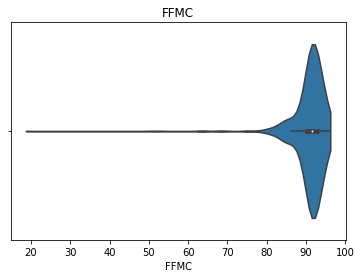

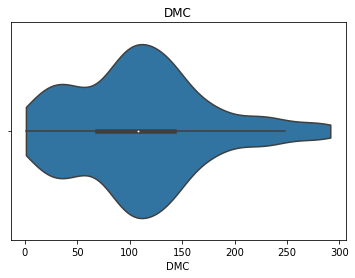

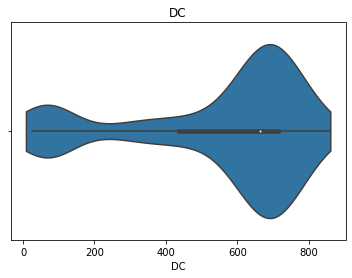

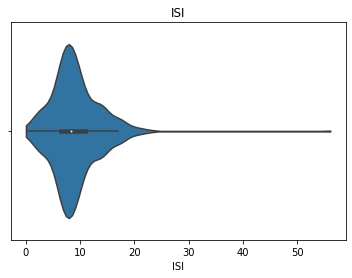

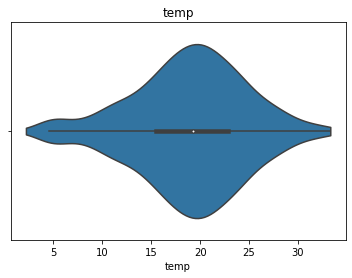

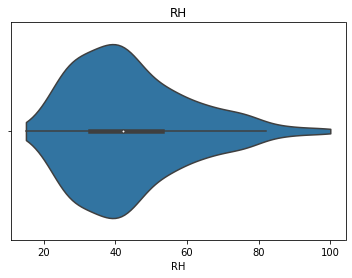

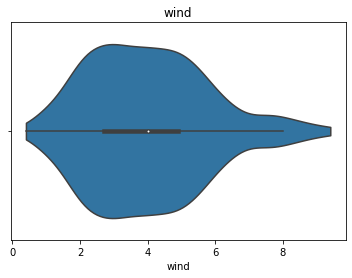

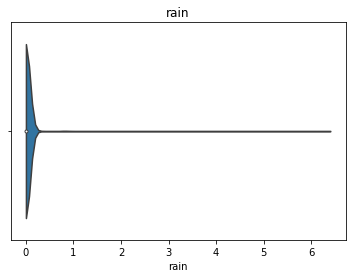

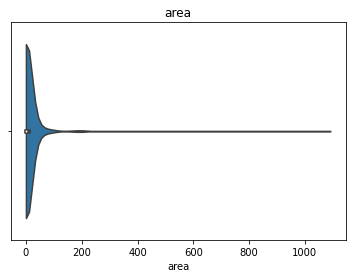

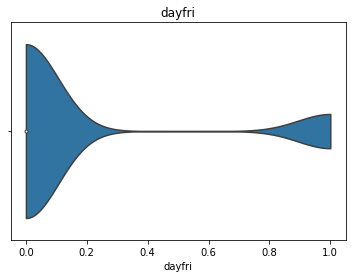

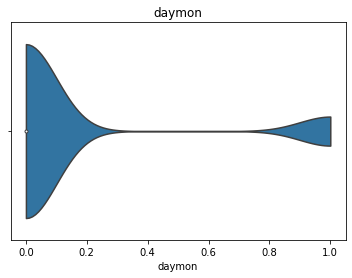

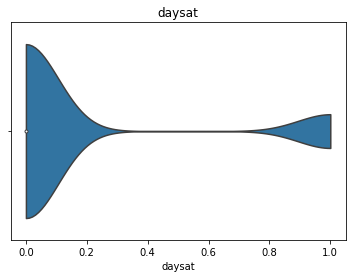

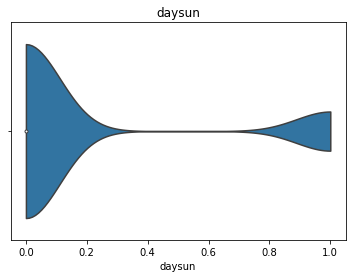

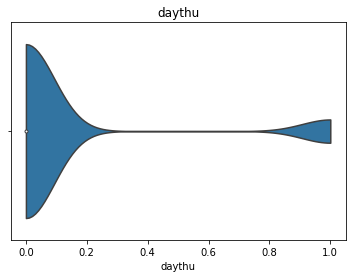

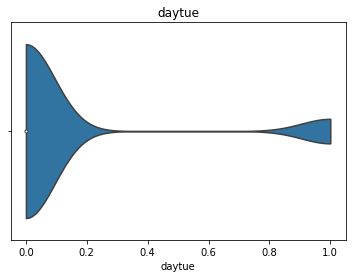

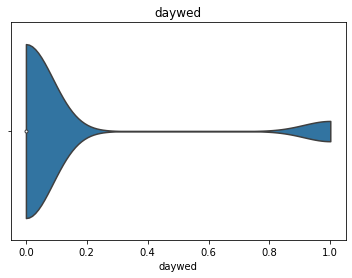

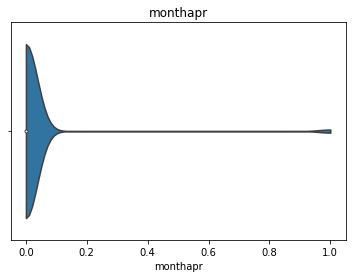

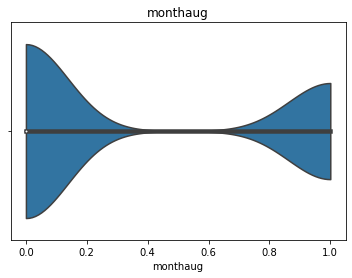

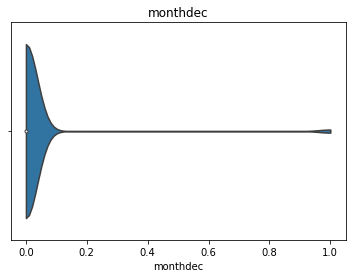

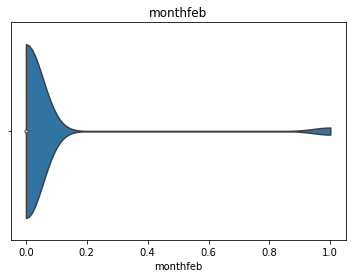

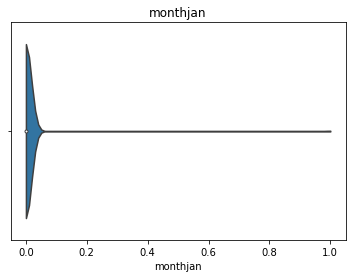

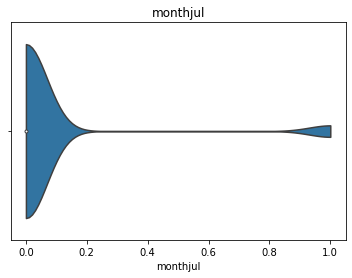

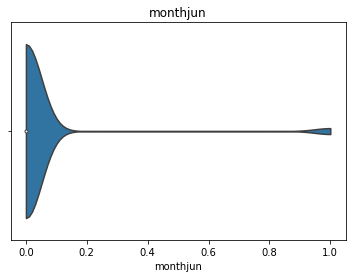

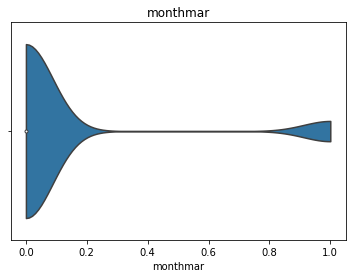

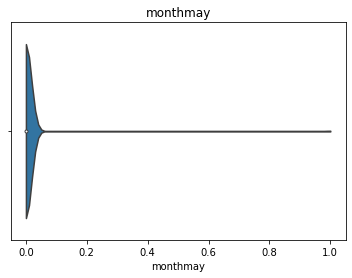

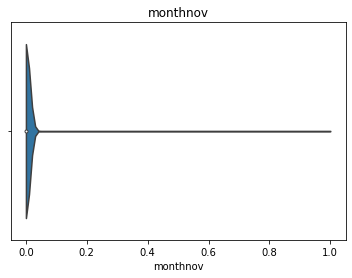

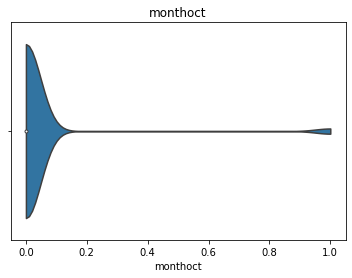

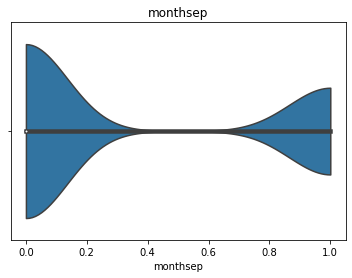

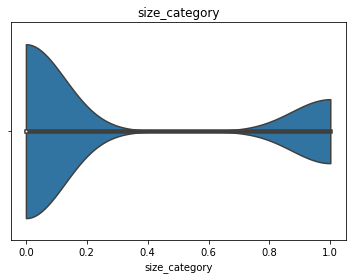

In [12]:
for i in Data.columns:
    sns.violinplot(x=Data[i],hue='size_category',data=Data,split=True,cut=0)
    plt.title(i)
    plt.show()
# sns.violinplot(x=Data.wind)

feature selection
----

In [14]:
!pip install ppscore
import ppscore

     |████████████████████████████████| 51kB 5.8MB/s 
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13067 sha256=b63bdc5be1c1a7e0ac4ebd6d9db1621d5d5d15cdc42c3fafe9e8dae60a506855
  Stored in directory: /root/.cache/pip/wheels/50/cc/8f/d0da07e4ec4e7a4c4cf32aee9057e4d1c318de910543b4684e
Successfully built ppscore


In [15]:
Data['size_category'] = Data.size_category.astype('category')

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FFMC           517 non-null    float64 
 1   DMC            517 non-null    float64 
 2   DC             517 non-null    float64 
 3   ISI            517 non-null    float64 
 4   temp           517 non-null    float64 
 5   RH             517 non-null    int64   
 6   wind           517 non-null    float64 
 7   rain           517 non-null    float64 
 8   area           517 non-null    float64 
 9   dayfri         517 non-null    int64   
 10  daymon         517 non-null    int64   
 11  daysat         517 non-null    int64   
 12  daysun         517 non-null    int64   
 13  daythu         517 non-null    int64   
 14  daytue         517 non-null    int64   
 15  daywed         517 non-null    int64   
 16  monthapr       517 non-null    int64   
 17  monthaug       517 non-null    int6

In [17]:
a = ppscore.matrix(Data)
a[a.y == 'size_category'].sort_values(by='ppscore',ascending=False)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
840,size_category,size_category,1.000000,predict_itself,True,None,0.00000,1.000000,None
260,area,size_category,0.994956,classification,True,weighted F1,0.61759,0.998071,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
57,DMC,size_category,0.130733,classification,True,weighted F1,0.61759,0.667583,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
115,ISI,size_category,0.100040,classification,True,weighted F1,0.61759,0.655846,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
202,wind,size_category,0.089634,classification,True,weighted F1,0.61759,0.651866,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
550,monthdec,size_category,0.087658,classification,True,weighted F1,0.61759,0.651111,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
86,DC,size_category,0.079881,classification,True,weighted F1,0.61759,0.648137,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
173,RH,size_category,0.052181,classification,True,weighted F1,0.61759,0.637544,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
144,temp,size_category,0.016083,classification,True,weighted F1,0.61759,0.623740,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."
28,FFMC,size_category,0.004292,classification,True,weighted F1,0.61759,0.619231,"DecisionTreeClassifier(ccp_alpha=0.0, class_we..."


## slected features (``area`` and ``DMC``)

In [18]:
X = Data.loc[:,['area','DMC']].values
y = Data.size_category.values

In [20]:
def scale(z):
    a=list()
    for x in z:
        a.append((x-np.min(z))/(np.max(z)-np.min(z)))
    return pd.Series(a)
Xscaled = scale(X)
Xscaled.head()

0    [0.0, 0.024018187818561843]
1    [0.0, 0.032452055296835466]
2     [0.0, 0.04006087052179972]
3     [0.0, 0.03052693337244692]
4    [0.0, 0.047027978438634446]
dtype: object

# Split the data into X & y

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state=42)

In [23]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((413, 2), (413,), (104, 2), (104,))

# Model building - with GridSearchCV()

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# clf = SVC()
# param_grid = [{'kernel':['linear', 'rbf', 'sigmoid'],'gamma':['auto','scale'],'C':[15,20,25,30,60], 
#                 'cache_size':[1000], 'verbose': [3] }]
# gsv = GridSearchCV(clf,param_grid,cv=5)
# gsv.fit(X_train,y_train)

In [29]:
gsv.best_params_,gsv.best_score_

({'C': 20,
  'cache_size': 1000,
  'gamma': 'auto',
  'kernel': 'linear',
  'verbose': 3},
 0.9975903614457831)

In [30]:
clf = SVC(C=20,cache_size=1000,gamma='auto',kernel='linear',verbose=3)
clf.fit(X_train,y_train)

[LibSVM]

SVC(C=20, break_ties=False, cache_size=1000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=3)

In [31]:
y_pred = clf.predict(X_train)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### TRAIN - Accuracy score and confusion matrix

In [32]:
print('***Train accuracy**** is ',accuracy_score(y_train,y_pred)*100)

accuracy 99.75786924939467


In [33]:
confusion_matrix(y_train,y_pred)

array([[301,   1],
       [  0, 111]])

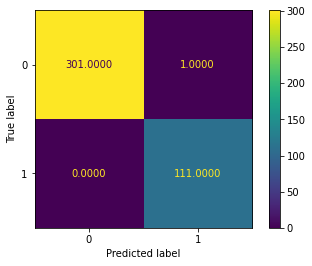

In [34]:
plot_confusion_matrix(clf,X_train,y_train,values_format='.4f')

### TEST - Accuracy score and confusion matrix

In [35]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [36]:
 print('accuracy = ', accuracy_score(y_test,y_pred))

accuracy =  1.0


In [37]:
confusion_matrix(y_test,y_pred)

array([[76,  0],
       [ 0, 28]])

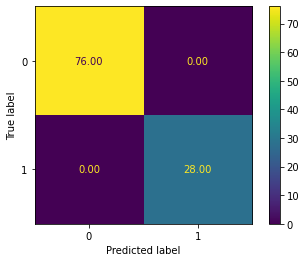

In [38]:
plot_confusion_matrix(clf,X_test,y_pred,values_format='.2f')

# Conclusion 

``Our model is behaving consistently on train and test data. The train accuracy score is 99.75% and the Test accuracy is 100% which is very good``